# 1.) Import the Credit Card Fraud Data From CCLE

In [ ]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/ECON441B/fraudTest.csv")

In [ ]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


# 2.) Select four columns to use as features (one just be trans_date_trans)

In [ ]:
df_select=df[['trans_date_trans_time','category','amt','city_pop','is_fraud']]

In [ ]:
df_select.columns

Index(['trans_date_trans_time', 'category', 'amt', 'city_pop', 'is_fraud'], dtype='object')

# 3.) Create a unique variable out of trans_date.

In [ ]:
type(df["trans_date_trans_time"][0])

str

In [ ]:
df_select['trans_date_trans_time']=pd.to_datetime(df_select['trans_date_trans_time'])

<ipython-input-27-9ba00a5dfdf3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select['trans_date_trans_time']=pd.to_datetime(df_select['trans_date_trans_time'])


In [ ]:
df_select['time_diff']=[i.second for i in df_select['trans_date_trans_time']]

<ipython-input-28-afb43170a1ec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select['time_diff']=[i.second for i in df_select['trans_date_trans_time']]


In [ ]:
dummies=pd.get_dummies(df_select['category'])
X=pd.concat([dummies,df_select[['amt','city_pop','time_diff']]],axis=1)
y=df_select['is_fraud']

In [ ]:
X.head()

,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel,amt,city_pop,time_diff
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2.86,333497,25
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,29.84,302,33
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,41.28,34496,53
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,60.05,54767,15
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3.19,1126,17


# 4.) Oversample the data (this will be your training data).

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
ros=RandomOverSampler(random_state=0)
X_resampled, y_resampled=ros.fit_resample(X,y)

# 5.) Train a Logistic regression.

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.model_selection import train_test_split 

In [ ]:
from pandas.core.common import random_state
X_train,X_test,y_train,y_test=train_test_split(X_resampled, y_resampled,test_size=0.2,random_state=0)

In [ ]:
log_reg=LogisticRegression().fit(X_train,y_train)

In [ ]:
y_pred=log_reg.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Accuracy:", accuracy_score(y_test,y_pred))
print("Precision:", precision_score(y_test,y_pred))
print("Recall:", recall_score(y_test,y_pred))

Accuracy: 0.7844104231585602
Precision: 0.8027760712640147
Recall: 0.7546335565140495


# 6.) The company you are working for wants to target at a False Positive rate of 5% what threshold should you use? (Use oversampled data)

In [ ]:
from sklearn.metrics import confusion_matrix 
# Make predictions with predict_proba
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]
# Set the threshold for false negative percentage
threshold_list = [(i+1)/1000 for i in range(1000)] 
false_negative_rate_list = []
for threshold in threshold_list:
  y_pred = (y_pred_proba > threshold).astype(int) 
  # Calculate confusion matrix
  tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel() 
  # Calculate false negative rate
  false_negative_rate = fn / (fn + tp)
    # Filter False Negetive Rate that is to large
  if abs(false_negative_rate - 0.05) > 0.01: 
    pass
  else:
      print("False Negative Rate: ", false_negative_rate) 
      print("Threshold: ", threshold)
  false_negative_rate_list.append((threshold, false_negative_rate))

False Negative Rate:  0.04004620021295411
Threshold:  0.187
False Negative Rate:  0.041408745555936544
Threshold:  0.188
False Negative Rate:  0.041408745555936544
Threshold:  0.189
False Negative Rate:  0.041760661240547906
Threshold:  0.19
False Negative Rate:  0.041760661240547906
Threshold:  0.191
False Negative Rate:  0.04201331865514068
Threshold:  0.192
False Negative Rate:  0.04201331865514068
Threshold:  0.193
False Negative Rate:  0.04335781703993792
Threshold:  0.194
False Negative Rate:  0.044133836241901425
Threshold:  0.195
False Negative Rate:  0.045866344227680426
Threshold:  0.196
False Negative Rate:  0.045866344227680426
Threshold:  0.197
False Negative Rate:  0.04642579993142156
Threshold:  0.198
False Negative Rate:  0.0469401382396997
Threshold:  0.199
False Negative Rate:  0.047914673981700386
Threshold:  0.2
False Negative Rate:  0.048320730540867336
Threshold:  0.201
False Negative Rate:  0.048320730540867336
Threshold:  0.202
False Negative Rate:  0.0487809279

### The threshold that we should use is 0.204.

# 7.) If the company makes .02*amt on True transactions and loses -amt on False (Use original data)

In [ ]:
y_pred_proba_or=log_reg.predict_proba(X)[:,1]
y_pred_or=(y_pred_proba_or>0.204).astype(int)

In [ ]:
df_select['predictions']=y_pred_or
df1_select=df_select[df_select["is_fraud"]==df_select["predictions"]].copy()
df2_select=df_select[df_select["is_fraud"]!=df_select["predictions"]].copy()
df1_select['pro']=0.2*df1_select["amt"]
df2_select['pro']=-1*df2_select["amt"]
Profit=df1_select['pro'].sum()+df2_select['pro'].sum()

<ipython-input-41-f9434f988a97>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select['predictions']=y_pred_or


In [ ]:
Profit

-34456088.87000001

# 8.) Using Logistic Regression Lasso to inform you. Would you use the selected features in a trusted prediction model?

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [ ]:
Lasso = LogisticRegression("l1", solver = 'liblinear')
Lasso.fit(X_train, y_train)
Lasso.coef_

array([[-2.65792904e+00, -9.06673929e-01,  1.46305331e-01,
        -5.11454570e-02, -7.19131581e-01, -5.70222138e-01,
        -1.53771952e+00, -6.60911674e-01, -3.46700471e+00,
        -4.61829702e-01, -2.94809592e-01, -4.65246042e+00,
        -4.45637378e+00,  9.27928449e-02,  1.06516808e-02,
        -5.42179783e-07,  1.39085965e-03]])

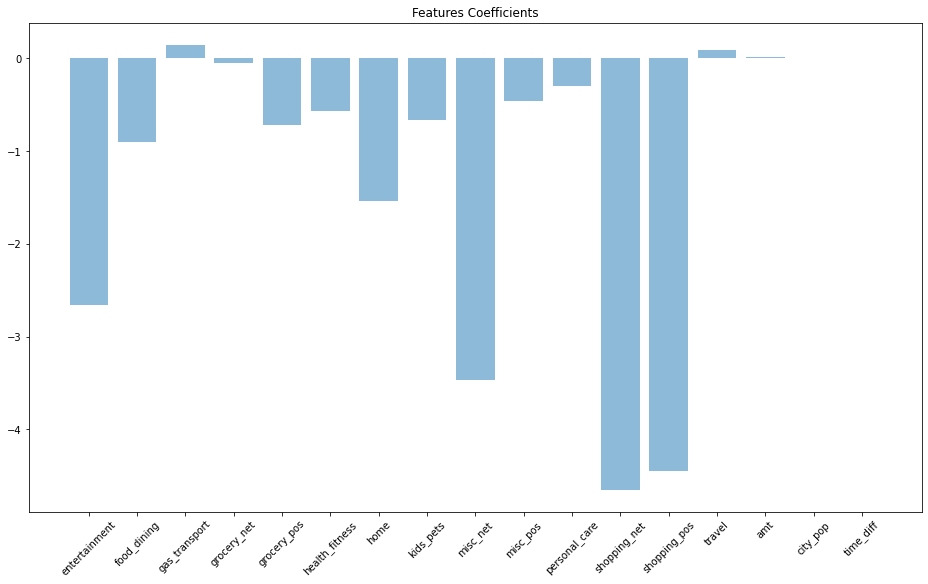

In [ ]:
objects=list(X_train.columns)
plt.figure(figsize=(16,9))
plt.bar(objects,Lasso.coef_[0],align='center', alpha=0.5)
plt.xticks(objects, rotation=45)
plt.title('Features Coefficients')
plt.show()

### Most of the dummies produced from the "category" are significantly different from 0 according to the coefficients of the Lasso model, indicating that it is an acceptable predictor for the model. However, "amt" only has a slight effect, and neither "city_pop" nor "time_diff" have any bearing on Lasso's penalty. Therefore, it is recommended to replace or do away with these three predictors.